# Machine Learning

Zusammenhänge in Datensets zu erkennen und einen Algorithmus zu erzeugen, welcher neue Daten automatisch einordnen kann

Um die Zusammenhänge zu Erkennen, wird ein Lernprozess ausgeführt

Dieser Lernprozess benötigt Resourcen (Leistung) und Zeit

Am Ende des Lernprozesses entsteht ein Model, dieses Model ist ein vollständiges Programm (mit Code)

Dem Model können Daten gegeben werden, dieses Model gibt danach neue Daten zurück

---

Beispiel: Wettervorhersage

Per ML anhand von verschiedenen Parametern eine Wettervorhersage machen

Inputs (Parameter): Datum, Zeit, Wolken%, Niederschlag%

Output: Temperatur

Beispiel:
- Datum: 2024-11-22
- Zeit: 11:15
- Wolken%: 100%
- Niederschlag: 0%
Ergebnis: 5°C, 3°C | Realität: 3°C

Bei 4 Parametern wäre es möglich, dieses Modell per Hand zu schreiben

Bei 10+ Parametern ist dies schwieriger

## Datenset

Das Income.csv Datenset enthält Personendaten, welche nach Einkommensklasse bewertet sind

Die class Spalte legt fest, ob die entsprechende über/unter 50.000$/Jahr verdient

Dieses Datenset wird für binäre Klassifizierung verwendet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Data/Income.csv")

In [3]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Probleme mit dem Datenset

- Alle Daten numerisch machen -> LabelEncoding
- Daten sind uneben -> Outlier reduzieren
- Daten anhand der Klasse (class) sind unausgeglichen -> Mögliche Neigung in die eine/andere Richtung

### Daten numerisch machen

Für die Konvertierung von Texten zu Zahlen kann der LabelEncoder verwendet werden

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
enc = LabelEncoder()

In [6]:
spalte = data["workclass"]

In [7]:
encoded = enc.fit_transform(spalte)

In [8]:
encoded

array([7, 6, 4, ..., 4, 4, 5])

In [9]:
data["workclass"] = encoded

In [10]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,7,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,6,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,4,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,4,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,4,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,4,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,4,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,4,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Jede textbasierte Spalte muss nun Encoded werden -> Funktion

In [11]:
def encodeColumn(colName):
    enc = LabelEncoder()
    spalte = data[colName]
    encoded = enc.fit_transform(spalte)
    data[colName] = encoded

In [12]:
data.select_dtypes("object").columns

Index(['education', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country', 'class'],
      dtype='object')

In [13]:
for col in data.select_dtypes("object").columns:
    encodeColumn(col)

In [14]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


### Datenset aufteilen

Das Datenset muss jetzt in Trainings-/ und Testset aufgeteilt werden (80%, 20%)

Dafür sollte noch die np.sample Funktion verwendet werden, diese mischt das Datenset

In [15]:
data.sample(frac=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
19505,23,4,119665,11,9,4,1,1,4,1,0,0,60,39,0
2116,37,4,35330,11,9,0,3,1,4,1,0,1669,55,39,0
18334,43,1,92775,8,11,0,3,1,4,1,0,0,40,39,0
22971,53,4,95519,11,9,2,10,0,4,1,0,0,42,39,1
14092,23,4,179413,11,9,4,3,4,4,1,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23678,69,6,240562,14,15,2,10,0,4,1,99999,0,40,39,1
8457,23,4,118693,9,13,4,8,1,4,1,0,0,35,39,0
24614,57,6,152030,15,10,2,12,5,4,0,0,0,25,39,1
178,18,4,183930,11,9,4,8,3,4,1,0,0,12,39,0


In [16]:
trainingAmount = int(len(data) * 0.8)
testAmount = len(data) - trainingAmount

In [17]:
trainingAmount

26048

In [18]:
testAmount

6513

In [19]:
randomized = data.sample(frac=1)
training = randomized[:trainingAmount]
test = randomized[trainingAmount:]

training_left = training.loc[:, :"native-country"]
training_right = training["class"]

test_left = test.loc[:, :"native-country"]
test_right = test["class"]

### Outlier reduzieren

Werte in bestimmten Spalten sind zu groß/klein für den Großteil der restlichen Werte in der Spalte

-> StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaled = scaler.fit_transform(training_left)  # class Spalte weglassen, diese soll nicht skaliert werden

In [22]:
pd.DataFrame(scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.627594,0.090050,-0.116638,0.954144,1.919136,-0.404960,0.814525,-0.900752,-1.947916,0.700114,-0.145964,4.151239,-0.034943,-2.886348
1,-0.407770,1.466186,0.026197,-0.338238,1.138603,-0.404960,-0.842461,-0.900752,0.395701,0.700114,-0.145964,-0.214252,0.771121,0.292764
2,-0.627594,0.090050,-0.771635,-0.338238,1.138603,-0.404960,0.814525,-0.900752,0.395701,0.700114,-0.145964,-0.214252,-0.034943,0.292764
3,-1.360340,0.090050,0.385724,1.212620,-0.032198,0.923304,0.341101,0.970582,0.395701,0.700114,-0.145964,-0.214252,0.771121,0.292764
4,0.251701,2.154254,-1.423707,0.437191,1.528869,-0.404960,0.814525,2.218138,0.395701,-1.428338,-0.145964,-0.214252,-1.647072,0.292764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,-0.041397,0.090050,-0.585323,0.437191,1.528869,0.923304,-1.315885,1.594360,0.395701,-1.428338,-0.145964,-0.214252,-0.034943,0.292764
26044,-0.993967,-2.662222,-0.100075,-2.406049,-1.202998,0.923304,-1.552597,1.594360,0.395701,-1.428338,-0.145964,-0.214252,-0.034943,0.292764
26045,0.764623,0.090050,0.245891,-0.338238,1.138603,-0.404960,0.104389,-0.900752,-1.947916,0.700114,-0.145964,-0.214252,0.609908,0.292764
26046,1.863742,1.466186,-0.104709,-1.113667,-1.983531,1.587436,1.761375,-0.276974,0.395701,0.700114,-0.145964,-0.214252,0.368089,0.292764


class anhängen mittels hstack

In [24]:
x = np.hstack([scaled, training_right.values.reshape(-1, 1)])

In [25]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.627594,0.090050,-0.116638,0.954144,1.919136,-0.404960,0.814525,-0.900752,-1.947916,0.700114,-0.145964,4.151239,-0.034943,-2.886348,0.0
1,-0.407770,1.466186,0.026197,-0.338238,1.138603,-0.404960,-0.842461,-0.900752,0.395701,0.700114,-0.145964,-0.214252,0.771121,0.292764,0.0
2,-0.627594,0.090050,-0.771635,-0.338238,1.138603,-0.404960,0.814525,-0.900752,0.395701,0.700114,-0.145964,-0.214252,-0.034943,0.292764,1.0
3,-1.360340,0.090050,0.385724,1.212620,-0.032198,0.923304,0.341101,0.970582,0.395701,0.700114,-0.145964,-0.214252,0.771121,0.292764,0.0
4,0.251701,2.154254,-1.423707,0.437191,1.528869,-0.404960,0.814525,2.218138,0.395701,-1.428338,-0.145964,-0.214252,-1.647072,0.292764,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,-0.041397,0.090050,-0.585323,0.437191,1.528869,0.923304,-1.315885,1.594360,0.395701,-1.428338,-0.145964,-0.214252,-0.034943,0.292764,0.0
26044,-0.993967,-2.662222,-0.100075,-2.406049,-1.202998,0.923304,-1.552597,1.594360,0.395701,-1.428338,-0.145964,-0.214252,-0.034943,0.292764,0.0
26045,0.764623,0.090050,0.245891,-0.338238,1.138603,-0.404960,0.104389,-0.900752,-1.947916,0.700114,-0.145964,-0.214252,0.609908,0.292764,0.0
26046,1.863742,1.466186,-0.104709,-1.113667,-1.983531,1.587436,1.761375,-0.276974,0.395701,0.700114,-0.145964,-0.214252,0.368089,0.292764,0.0


In [26]:
training = pd.DataFrame(x)

### Unausgeglichene Daten ausgleichen

Beim Trainingsset sollten für den Lernprozess keine Unterschiede in der Menge der Klassen bestehen

In [37]:
training[14].value_counts()

14
0    19803
1     6245
Name: count, dtype: int64

In [38]:
from imblearn.over_sampling import RandomOverSampler

In [39]:
ros = RandomOverSampler()

In [40]:
left, right = ros.fit_resample(training_left, training_right)  # 2 Parameter: Alle Daten ohne class, Nur die class

In [41]:
training_left = left
training_right = right

In [42]:
training = pd.DataFrame(np.hstack([training_left, training_right.values.reshape(-1, 1)]))

In [43]:
training[14].value_counts()

14
0    19803
1    19803
Name: count, dtype: int64

## Vorgegebene Modelle (Scikit-Learn)

In Scikit-Learn gibt es vorgegebene Modelle, welche einfaches ML ermöglichen

### kNN (k-nearest neighbors)

Neuer Datenpunkt hat keine Klasse

Es wird geprüft, wieviele andere Datenpunkte in der Nähe des neuen Punkts liegen

Je nachdem wie viele Datenpunkte mit der jeweiligen Klasse an dem neuen Punkt liegen, bekommt der neue Punkt seine Klasse

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(7)  # Hier sollte eine ungerade Zahl für k gegeben werden

In [46]:
knn_model = knn.fit(training_left, training_right)

In [47]:
prediction = knn_model.predict(test_left)

In [48]:
prediction

array([0, 0, 1, ..., 0, 1, 0])

In [49]:
prediction == test_right

11500     True
18875     True
11333    False
14724    False
7860      True
         ...  
14280     True
32334     True
23759     True
31622    False
3332      True
Name: class, Length: 6513, dtype: bool

In [50]:
(prediction == test_right).value_counts()

class
True     4130
False    2383
Name: count, dtype: int64

4071 korrekte Vorhersagen, 2442 falsche Vorhersagen

Jetzt können wir eine Funktion schreiben, welche die Auswertung durchführt

In [51]:
def evaluate(prediction):
    values = (prediction == test_right).value_counts()
    print(f"Korrekte Vorhersagen: {values[True]} ({values[True] / len(prediction) * 100}%)")
    print(f"Falsche Vorhersagen: {values[False]} ({values[False] / len(prediction) * 100}%)")

In [52]:
evaluate(prediction)

Korrekte Vorhersagen: 4130 (63.41163826193766%)
Falsche Vorhersagen: 2383 (36.58836173806234%)


### Naive Bayes

Bildet Wahrscheinlichkeiten

Die einzelnen Wahrscheinlichkeiten pro Spalte werden zusammengebaut, und die Gesamtwahrscheinlichkeit wird für die Klassfizierung verwendet

Wenn die Wahrscheinlichkeit näher an 50% ist, wird der Punkt auf die eine/andere Seite klassifiziert

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
nb = GaussianNB()

In [55]:
nb_model = nb.fit(training_left, training_right)

In [56]:
prediction = nb_model.predict(test_left)

In [57]:
evaluate(prediction)

Korrekte Vorhersagen: 5153 (79.11868570551205%)
Falsche Vorhersagen: 1360 (20.881314294487947%)


### Logistische Regression

Ein Punkt wird auf einer Regressionskurve platziert

Wenn dieser Punkt über/unter einem gewissen Grenzwert ist (Threshold), wird dieser zu 0/1 klassifiziert

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr = LogisticRegression()

In [60]:
lr_model = lr.fit(training_left, training_right)

C:\Users\lk3\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
prediction = lr_model.predict(test_left)

In [62]:
evaluate(prediction)

Korrekte Vorhersagen: 4574 (70.22877322278521%)
Falsche Vorhersagen: 1939 (29.7712267772148%)


### Support Vector Machines

In das Datenset wird eine Hyperplane gelegt (H), diese breitet sich aus mit einem Margin (M)

Alle Punkte welche von der Hyperplane erwischt werden, werden zum nächsten Punkt der bereits klassifiziert ist zugewiesen

In [63]:
from sklearn.svm import SVC

In [64]:
svc = SVC()

In [65]:
svc_model = svc.fit(training_left, training_right)

In [66]:
prediction = svc_model.predict(test_left)

In [67]:
evaluate(prediction)

Korrekte Vorhersagen: 5170 (79.37970213419315%)
Falsche Vorhersagen: 1343 (20.620297865806847%)


## Neurales Netzwerk

Besteht aus Schichten, diese Schichten bestehen wiederum aus einzelnen Neuronen (Nodes)

Jede Node besteht aus:
- Dem Input-Teil diese werden multipliziert
- Dem Summenteil, dieser summiert die gerade multiplizierten Inputs
- Der Activation Function, diese wendet eine beliebige mathematische Funktion auf die gerade berechnete Summe an

Die Neuronen werden in Schichten angelegt, diese Schichten werden miteinander verbunden

---

Ausführung

Jede Schicht wird vollständig ausgeführt, wenn alle Neuronen fertig sind, wird die nächste Schicht gestartet

Wenn alle Schichten fertig sind, geht der Prozess von vorne los, mit den gerade gewonnenen Erkenntnissen

Der Loss-Wert gibt die Ungenauigkeit des Modells an, der Loss sollte minimiert werden

In [68]:
import tensorflow as tf

In [69]:
# Model aufbauen mithilfe von Keras (eine Tensorflow API)
model = tf.keras.Sequential([  # Hier wird eine Liste von Layern (Schichten) benötigt
    tf.keras.layers.Input(shape=(14, )),  # Der erste Layer ist immer der Input-Layer. Definiert, wieviele Spalten unsere Daten haben
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # Die letzte Schicht, dank sigmoid-Funktion kommt hier immer ein Wert zw. 0 und 1 zurück
])

In [70]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam(0.001))

In [71]:
history = model.fit(training_left, training_right, verbose=1, epochs=50)

Epoch 1/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5489 - loss: 2369.3269
Epoch 2/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5675 - loss: 135.1505
Epoch 3/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5615 - loss: 136.5227
Epoch 4/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5610 - loss: 128.2293
Epoch 5/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5649 - loss: 110.0366
Epoch 6/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5658 - loss: 101.7382
Epoch 7/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5718 - loss: 92.3770
Epoch 8/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5855 - loss: 78.3410
Epoch 9/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5783 - loss: 77.2396
Epoch 10/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5770 - loss: 64.2518
Epoch 11/50
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5785 - loss: 74.7755
Epoch 12/50


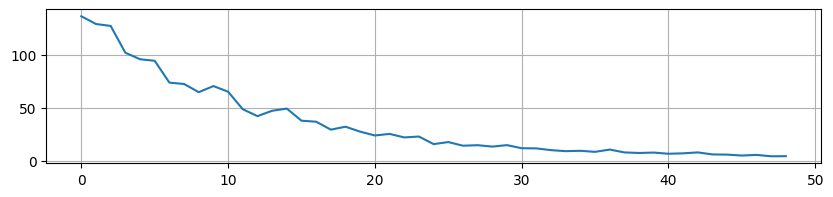

In [91]:
plt.figure(figsize=(10, 2))
plt.grid()
plt.plot(history.history["loss"][1:])

In [73]:
tf.keras.models.save_model(model, "Income.keras")

In [74]:
model = tf.keras.models.load_model("Income.keras")

In [75]:
prediction = model.predict(test_left)  # array([0.91262436, 0.43302774, 0.9983835 , ..., 0.3682304 , 0.37959483, 0.27495033], dtype=float32)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [76]:
pd.Series((prediction > 0.5).reshape(-1)).value_counts()

True     3432
False    3081
Name: count, dtype: int64

In [87]:
evaluate((prediction > 0.5).reshape(-1))

Korrekte Vorhersagen: 4277 (65.6686626746507%)
Falsche Vorhersagen: 2236 (34.3313373253493%)
